# Spambase
Group 7 - Project Proposal
- Evan Armstrong
- Rapeewit Chanprakaisi #57529208
- Riyan Qureshi
- Kathryn Wu

## Introduction

The Spambase dataset is a "bag of words"-style collection of assorted emails. Its variables include the frequencies of various words, the lengths of uninterrupted capital letter sequences, and the class, spam(1) or non-spam(0).

Spam email is unsolicited bulk email, often explicit or commercial, and has been problematic since the 1990s (Cranor et al., 1998, p.74). Spam is low-cost to send, but burdens service providers and wastes recipients' resources. While declining as of 2013, spam has become sophisticated, disguising itself from filters (Irani et al., 2013, p.2).

Due to spam's evolution, people may need to manually separate spam and non-spam. To supply intuition with data, we will look for a difference between the two. We focus on the average length of sequences of capital letters, since spam often tries to garner attention or create a sense of urgency.

The question we set out to answer is:
#### "Is the mean of the average length of uninterrupted sequences of capital letters different for spam vs non-spam email?"

If there is a difference, our analysis could be used to decide an email is spam. For instance, an email with unusually long sequences of capital letters would be suspect.

While we do not design a model to automatically detect spam, we hope the insights gleaned provide a basis for users' dealing with suspicious messages.

## Preliminary Results

We will first load the needed packages.

In [57]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(ggplot2)

`read.csv()` reads the dataset from the web. The data is tidy, but we need to rename the columns with `col_names()`and convert 0 and 1 to 'non-spam' and 'spam' in the class variable. 

In [50]:
spambase <- read.csv("https://raw.githubusercontent.com/rchanpra/stat-201-project/main/spambase/spambase.data")

In [51]:
colnames(spambase) <- c("word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our",
                        "word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail",
                        "word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses",
                        "word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit",
                        "word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp",
                        "word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs",
                        "word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85",
                        "word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct",
                        "word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project", "word_freq_re",
                        "word_freq_edu","word_freq_table","word_freq_conference","char_freq_;","char_freq_(",
                        "char_freq_[","char_freq_!","char_freq_$","char_freq_#","capital_run_length_average",
                        "capital_run_length_longest","capital_run_length_total","class")

In [52]:
spambase <- 
    spambase %>% 
    mutate(class = ifelse(class == 1, "spam", "non-spam"))

In [53]:
nrow(spambase)
head(spambase)

[1] 4600

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,⋯,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
5,0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam
6,0.00,0.00,0.00,0,1.92,0.00,0.00,0.00,0.00,0.64,⋯,0.00,0.054,0,0.164,0.054,0.000,1.671,4,112,spam


We compute the sample mean and standard deviation of average run length of capital letters, the count of spam and non-spam, and the difference in means.

In [62]:
# Considering that the dataset is a sample from the larger population of spam email,
# computing the mean and standard deviation of the word frequencies for each class produces our point estimates
# We select the columns we need (class and capital_run_length_average)

spambase_selected <- spambase %>%
    select(capital_run_length_average,class) 

spambase_stats <- spambase_selected %>%
    group_by(class) %>%
    summarize(mean_capital_run_length_average = mean(capital_run_length_average),
              sd_capital_run_length_average = sd(capital_run_length_average),
              n = n())

diff_in_means <- spambase_stats$mean_capital_run_length_average[2] - spambase_stats$mean_capital_run_length_average[1]


head(spambase_stats)
diff_in_means

class,mean_capital_run_length_average,sd_capital_run_length_average,n
<chr>,<dbl>,<dbl>,<int>
non-spam,2.377301,5.113685,2788
spam,9.522345,49.859762,1812


[1] 7.145045

Spam has a greater sample mean and standard deviation than non-spam email.

We visualize the sample distribution using `geom_boxplot()` and `geom_histogram()`.

In [55]:
# Graph the distribution of variable of interest for each class, with vertical lines indicating the means of each class
options(repr.plot.width = 8, repr.plot.height = 4)

spam_boxplot <- spambase_selected %>% 
    ggplot() +
    geom_boxplot(aes(class, capital_run_length_average, fill = class), outlier.shape = NA) +
    # we do not display some extreme values, which are impractical to plot
    scale_y_continuous(limits = c(0, 10)) +
    theme(text = element_text(size = 8)) +
    ggtitle("Boxplot of average length of capital letter runs for Spam and Non-Spam emails") + 
    xlab("Class") + 
    ylab("Average length of uninterrupted sequence of capital letters")

Warning message:
“Removed 189 rows containing non-finite values (`stat_boxplot()`).”
Warning message in plot_grid(spam_histogram, non_spam_histogram, cols = 2):
“Argument 'cols' is deprecated. Use 'ncol' instead.”
Warning message:
“Removed 42 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


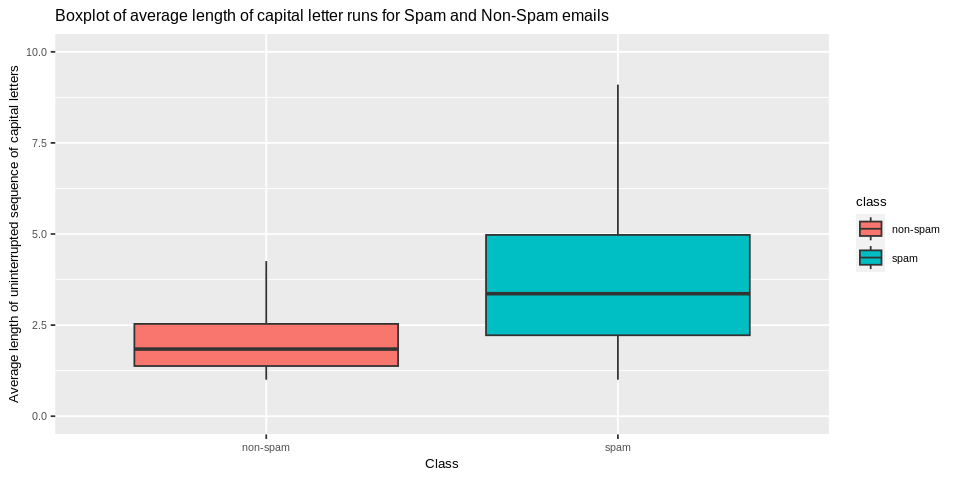

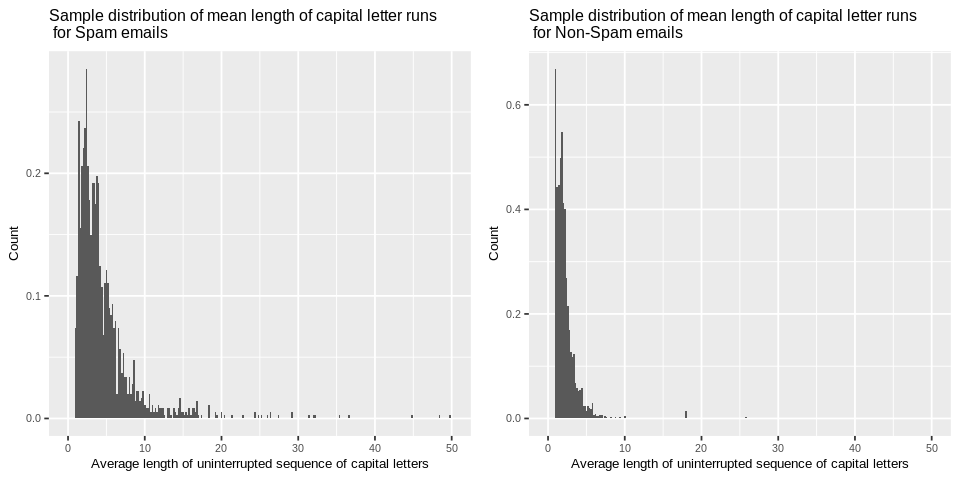

In [56]:
spam_histogram <- spambase_selected %>% 
    filter(class == "spam") %>%
    ggplot() +
    geom_histogram(aes(x = capital_run_length_average, y = ..density..), binwidth = 0.2) +
    # we do not display some extreme values, which are impractical to plot
    scale_x_continuous(limits = c(0, 50)) +
    theme(text = element_text(size = 8)) +
    ggtitle("Sample distribution of mean length of capital letter runs \n for Spam emails") + 
    ylab("Count") + 
    xlab("Average length of uninterrupted sequence of capital letters")

non_spam_histogram <- spambase_selected %>% 
    filter(class == "non-spam") %>%
    ggplot() +
    geom_histogram(aes(x = capital_run_length_average, y = ..density..), binwidth = 0.2) +
    # we do not display some extreme values, which are impractical to plot
    scale_x_continuous(limits = c(0, 50)) +
    theme(text = element_text(size = 8)) +
    ggtitle("Sample distribution of mean length of capital letter runs \n for Non-Spam emails") + 
    ylab("Count") + 
    xlab("Average length of uninterrupted sequence of capital letters")

spam_boxplot
plot_grid(spam_histogram, non_spam_histogram, cols = 2)

*Note: some larger values/outliers are not pictured in order to fit the majority of values

Spam emails seem to typically have a greater average length with a wider range.
The distributions for both are unimodal and strongly right-skewed.

Based on these results, we might be convinced an email with longer all capital sentences is more likely to be spam.

## Methods: Plan

The `Spambase` dataset is large — containing 1812 spam emails and 2788 non-spam. Given that the sample came from a variety of sources, we could presume the sample is representative, and our estimates of the mean values for spam and non-spam are close to the true values.

However, point estimates are single values, and do not give us any idea how close they are likely to be to the true values, nor do we know if the difference that occured is probable even when the means are the same.

For our final analysis, we will perform bootstrap sampling to build a confidence interval of the difference in means, which will give us a range of values we are confident contains the true difference. 
We will also do a hypothesis test for the difference in means, using $H_0: \mu_1 = \mu_0$ vs $H_1: \mu_1\neq \mu_0$, where 1 and 0 represent spam and non-spam.
If the confidence interval contains 0, then we would be unable to claim that there is a difference. If p-value  from our hypothesis test is above the significance level, then such a $\mu_1 - \mu_0$ is plausible and we cannot reject the null hypothesis that there is no difference.

This information could prove useful for individuals sorting through unsolicited messages in their inbox. 
These findings may help marketing companies avoid being mistaken for spam. While plenty of models exist to detect spam, human-interpretable data might make it easier for the engineers and managers behind the models to make informed decisions and deliberate improvements. Lastly, there is also the possibility that scammers will use these findings to evade detection.

Our study is limited in scope to only sequences of capital letters. The dataset contains many other variables which are themselves a subset of the words harvested from the original dataset. An immediate followup that arises is: 
What other patterns exist? Which are associated with spam and non-spam? 

## References

- Hopkins,Mark, Reeber,Erik, Forman,George, and Suermondt,Jaap. (1999). Spambase. UCI Machine Learning Repository. https://doi.org/10.24432/C53G6X.